Our main objective is to understand the trends of customers that churn and possible reasons why customers churn.This analysis also provide insights about trends of loyal customers.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/asus/Desktop/Prachi _1/customer churn/telecom_customer_churn.csv" , encoding = "unicode_escape")


# DATA CLEANING

In [3]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [6]:
df.head().isnull()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
df = df.drop(columns=['Zip Code', 'Latitude', 'Longitude', 'Number of Referrals'])


In [9]:
df['Avg Monthly Long Distance Charges'].fillna(0 , inplace = True)

In [10]:
df['Avg Monthly GB Download'].fillna(0 , inplace = True)

In [11]:
service_col = ['Online Security','Multiple Lines','Online Backup','Device Protection Plan','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']
df[service_col]=df[service_col].fillna('No Service')

In [12]:
churn_col = ['Churn Category','Churn Reason']
df[churn_col]=df[churn_col].fillna('Not Applicable')

In [13]:
df['Premium Tech Support']=df['Premium Tech Support'].fillna('No service')
df['Internet Type']=df['Internet Type'].fillna('No Internet Service')

In [14]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge           

# EXPLORATORY DATA ANALYTICS

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [16]:
df.describe()

,Age,Number of Dependents,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,32.386767,22.958954,20.515405,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,24.542061,15.448113,20.418940,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,1.000000,0.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,9.000000,9.210000,3.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,29.000000,22.890000,17.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,55.000000,36.395000,27.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [17]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

<AxesSubplot:xlabel='Customer Status', ylabel='count'>

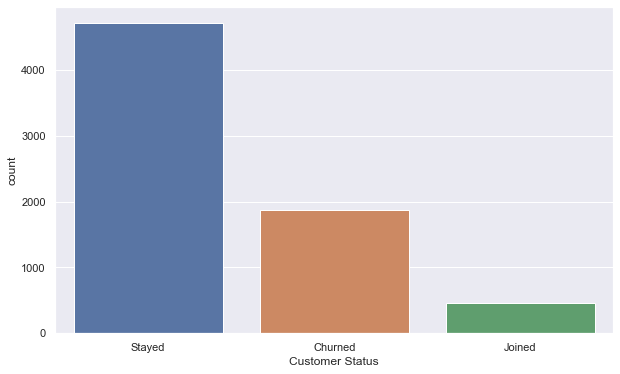

In [18]:
sns.set_theme(rc={'figure.figsize':(10,6)})
sns.countplot(data = df , x='Customer Status')

In [21]:
df['Customer Status'].value_counts()


Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

There is a small portion of churned customers 

<AxesSubplot:xlabel='Customer Status', ylabel='count'>

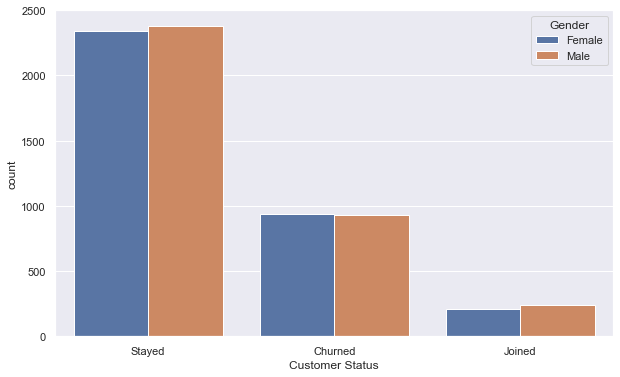

In [22]:
sns.countplot(data = df , x='Customer Status', hue = 'Gender')

There is a equal Gender split of churned customers

<AxesSubplot:xlabel='Age', ylabel='Count'>

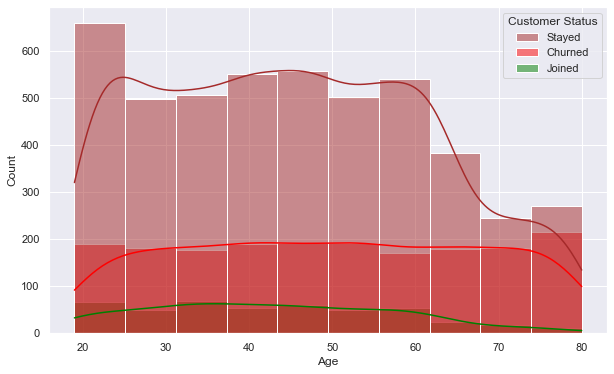

In [23]:
sns.histplot(data=df, x='Age',
             hue='Customer Status',
             kde=True,
             bins=10,
             palette={'Churned': 'red', 'Stayed': 'Brown','Joined':'Green'})


<AxesSubplot:xlabel='Married', ylabel='count'>

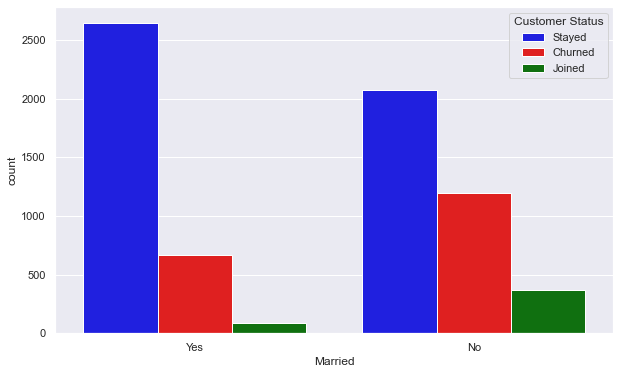

In [24]:
sns.countplot(data = df, x='Married',hue='Customer Status',palette ={'Churned':'Red','Joined':'Green','Stayed':'Blue'})

Most of the Churned Customers are Not Married

<AxesSubplot:xlabel='Number of Dependents', ylabel='count'>

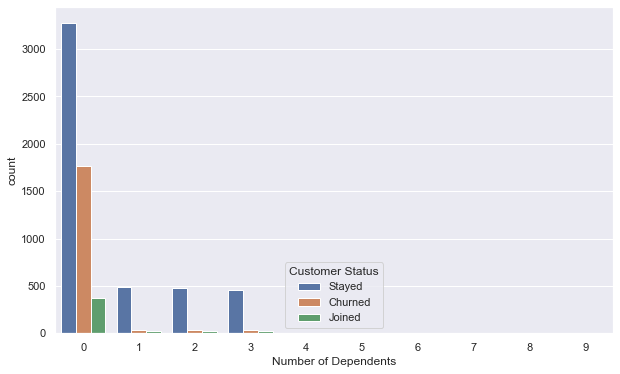

In [25]:
sns.countplot(data=df, x='Number of Dependents', hue='Customer Status')

The churned customers have zero dependents on them

<AxesSubplot:xlabel='Customer Status', ylabel='Monthly Charge'>

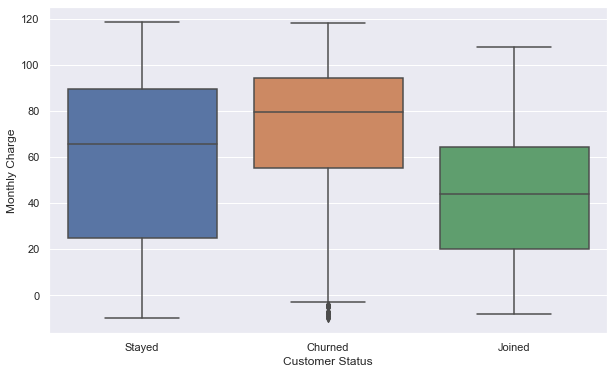

In [26]:
sns.boxplot(data = df , x= 'Customer Status',y='Monthly Charge')

The monthly charges of 50% of the churned customers is between 60 - 90

<AxesSubplot:xlabel='Payment Method', ylabel='count'>

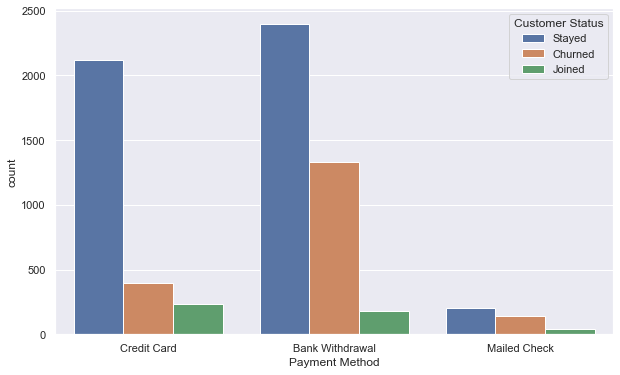

In [27]:
sns.countplot(data=df, x='Payment Method', hue='Customer Status')

Churned customers have used Bank withdrawal payment method

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

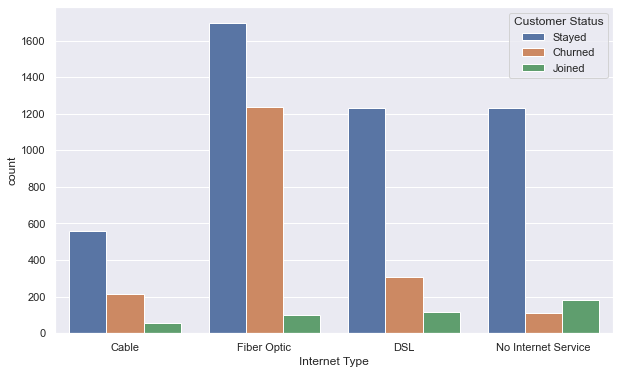

In [28]:
sns.countplot(data=df, x='Internet Type', hue='Customer Status')

The Internet Type of the churned customers majorly was of Fiber Optic

<AxesSubplot:xlabel='Online Security', ylabel='count'>

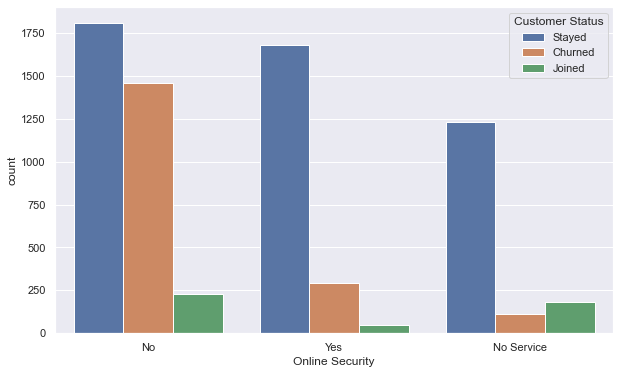

In [29]:
sns.countplot(data=df, x='Online Security', hue='Customer Status')

Churned customers have got no Online Security

<AxesSubplot:xlabel='Streaming TV', ylabel='count'>

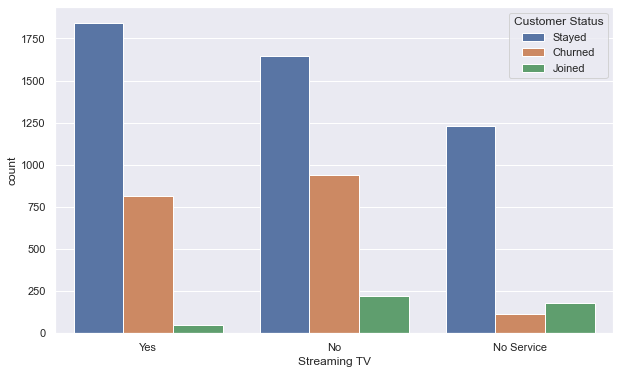

In [30]:
sns.countplot(data=df, x='Streaming TV', hue='Customer Status')

almost equal split for streaming tv feature among churned customer

<AxesSubplot:xlabel='Streaming Music', ylabel='count'>

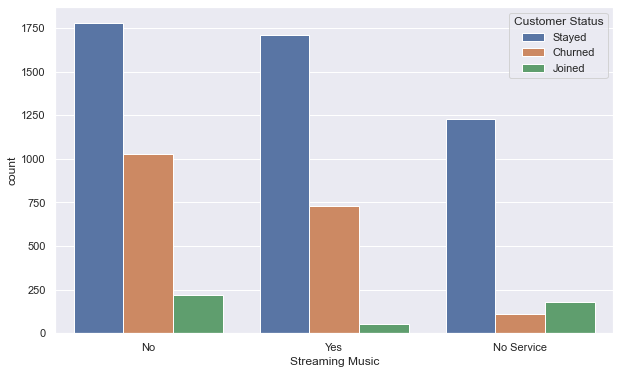

In [36]:
sns.countplot(data=df, x='Streaming Music', hue='Customer Status')

Almost an equal split for churned customers in Straming Tv and Music features.Inorder to get further insights analysis have to be made on other aspects of service provided.

<AxesSubplot:xlabel='Contract', ylabel='count'>

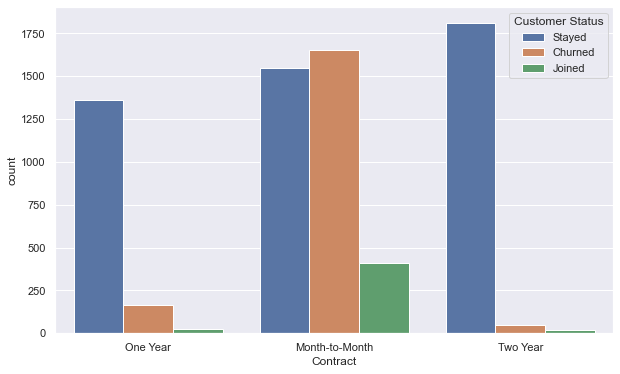

In [31]:
sns.countplot(data=df, x='Contract', hue='Customer Status')

Churned Customers have got Month-to-Month Contract

<AxesSubplot:xlabel='Tenure in Months', ylabel='Count'>

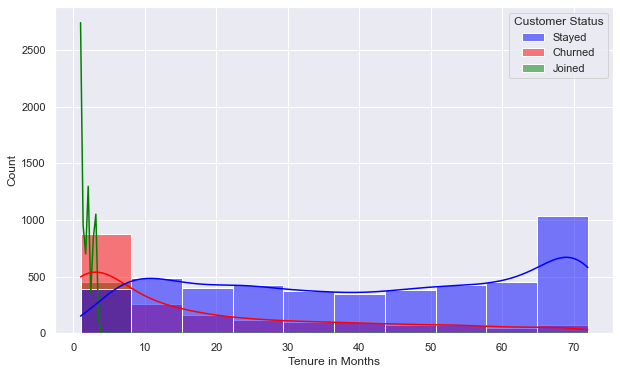

In [32]:
sns.histplot(data=df, x='Tenure in Months', hue='Customer Status', kde=True,bins=10,palette ={'Churned':'Red','Joined':'Green','Stayed':'Blue'})

Customers have churned within 0-10 months of using the services

<AxesSubplot:xlabel='Unlimited Data', ylabel='count'>

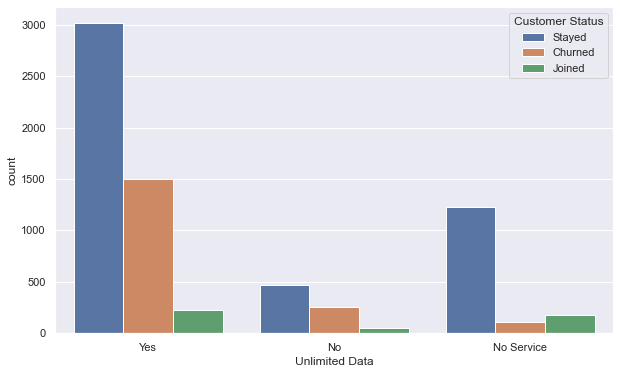

In [33]:
sns.countplot(data=df, x='Unlimited Data', hue='Customer Status')

Most of the Churned customers have got Unlimited data plans

<AxesSubplot:>

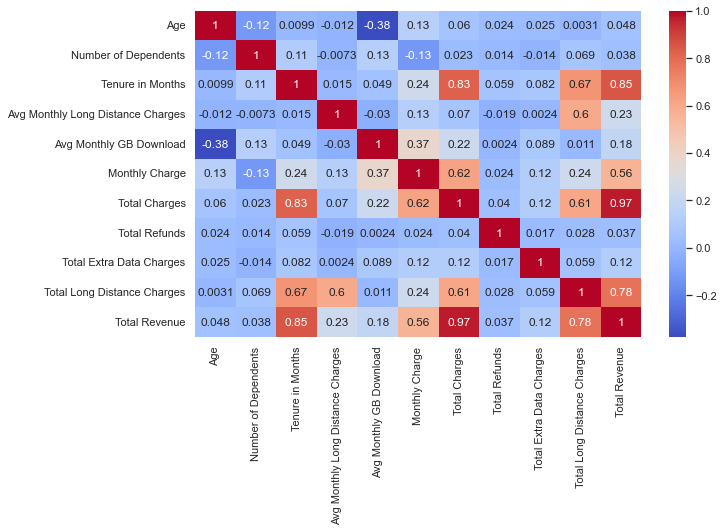

In [34]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Monthly Charge (0.187) – Customers with higher monthly charges tend to have a slightly higher likelihood of churning. This suggests that expensive plans might contribute to churn.

Age (0.116) – Older customers show a weak positive correlation with churn, indicating that they might be slightly more prone to leaving.

Number of Referrals (-0.287) – A moderate negative correlation suggests that customers who refer others are less likely to churn, implying that engagement and satisfaction increase retention.

Tenure in Months (-0.353) – A relatively strong negative correlation indicates that customers who have been with the company longer are less likely to churn.

Total Revenue (-0.223) and Total Charges (-0.199) – Customers with higher cumulative spending over time are less likely to churn, meaning long-term value customers are generally more loyal.

Number of Dependents (-0.219) – Customers with more dependents are less likely to churn, possibly due to greater reliance on the service for family needs.

Total Long Distance Charges (-0.224) – Customers with higher long-distance usage are more likely to stay, suggesting value perception in such services.

Total Refunds (-0.034) – Weak negative correlation suggests refunds have a minor impact on churn, meaning refund policies may not heavily influence customer retention.

<AxesSubplot:xlabel='Churn Category', ylabel='count'>

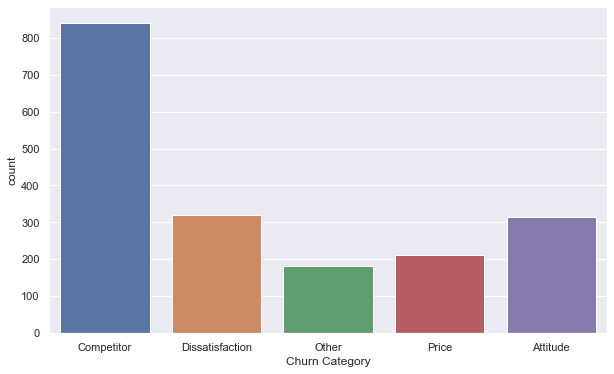

In [35]:
sns.countplot(data=df.where(df!='Not Applicable'), x='Churn Category')


The reasons for Customer Churn are:
1)Competitor
2)Dissatisfaction
3)Attitude

# Conclusion

Some insights about the churned customers are as follows:

*Most of the churned customers are unmarried and have zero dependents.|
*The monthly charges of 50% of the churned customers is between 60 - 90 and have used Bank withdrawal payment method.
*The Internet Type used by the churned customers majorly was of Fiber Optic with no Online Security.
*Churned Customers have got Month-to-Month Contract.Customers with higher monthly charges tend to have a slightly higher likelihood of churning. This suggests that expensive plans might contribute to churn.
*Customers tend to churn within 0-10 months of using the service.
*Most of the Churned customers have got Unlimited data plans.
*Older customers  might be slightly more prone to leaving.
*Total refunds have a minor impact on churn, meaning refund policies may not heavily influence customer retention.
*The reasons for Customer Churn are: 1)Competitor 2)Dissatisfaction 3)Attitude


Some insights about customer retention are as follows:

*Customers who refer others are less likely to churn, implying that engagement and satisfaction increase retention.
*Customers with higher long-distance usage are more likely to stay, suggesting value perception in such services.
*Customers with more dependents are less likely to churn, possibly due to greater reliance on the service for family needs.
*Customers with higher cumulative spending over time are less likely to churn, meaning long-term value customers are generally more loyal.
*Customers who have been with the company longer are less likely to churn.